In [253]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [254]:
%matplotlib inline

## Objective
Goal: Answer question with data

Examples:
1. What is the most common star type in the data?
2. What common patterns do you notice between any two properties? Ex: Is there a relationship between the star color and temperature?
3. What properties are the most influential in classifying a star's type?
4. Can you make a similar graph as the one shown in Kaggle to showcase the data as a Hertzsprung-Russell Diagram?
5. Train a machine learning model to then predict the star type of a row of data (without the star type field) and find the model's accuracy. Bonus: Can you find the row of data that most closely resembles our star, the Sun?

In [255]:
df = pd.read_csv('../input/star-dataset/6 class csv.csv')

In [257]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [258]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Finding most common star type

In [259]:
df.groupby('Star type').count()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
Star type,,,,,,
0,40,40,40,40,40,40
1,40,40,40,40,40,40
2,40,40,40,40,40,40
3,40,40,40,40,40,40
4,40,40,40,40,40,40
5,40,40,40,40,40,40


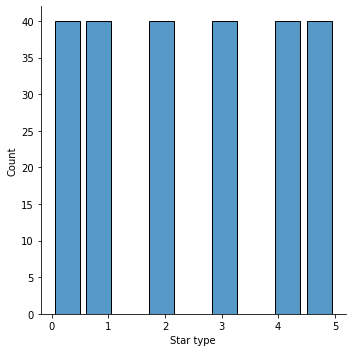

In [260]:
sns.displot(data=df, x='Star type',shrink=0.8)

**Question 1:** The star types are evenly distributed among the dataset, with each type having 40 datapoints.

# Relationships between variables

Analyzing the relationships between the variables, especially the relationship between star type and other variables

<Figure size 432x288 with 0 Axes>

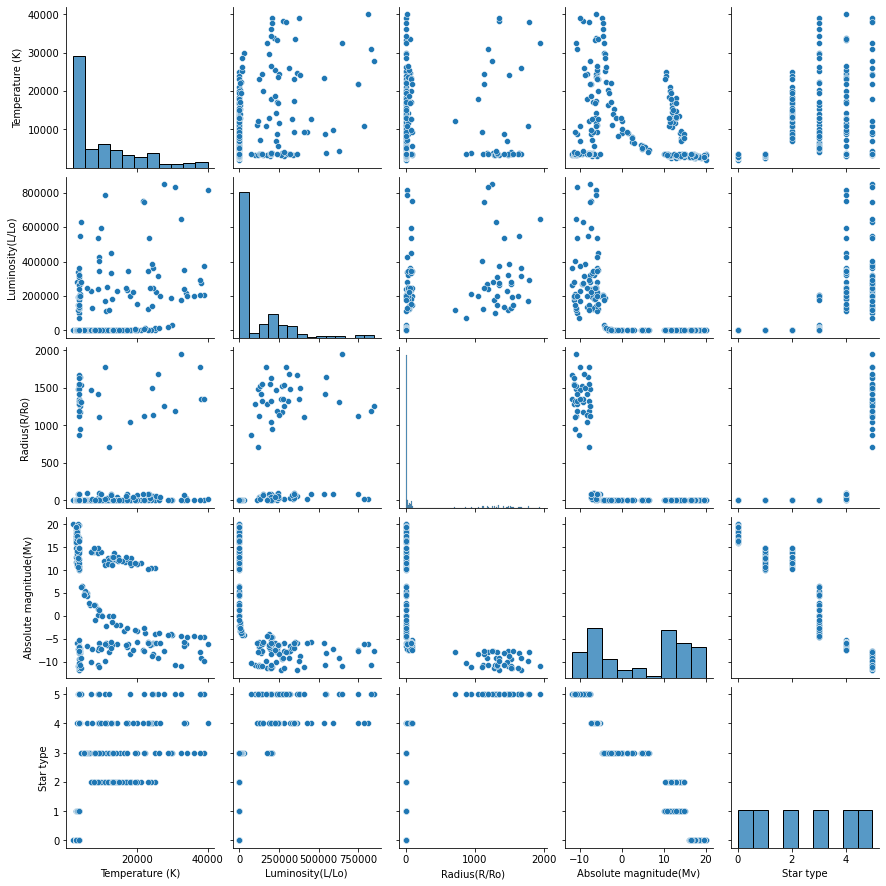

In [261]:
plt.tight_layout()
sns.pairplot(df)

In [281]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,-0.697438,-0.207852
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,-0.393509,0.275280
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.000818,0.097124
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.333552,-0.085840
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.317103,-0.049131
Star color,-0.697438,-0.393509,-0.000818,0.333552,-0.317103,1.000000,-0.006298
Spectral Class,-0.207852,0.275280,0.097124,-0.085840,-0.049131,-0.006298,1.000000


<AxesSubplot:>

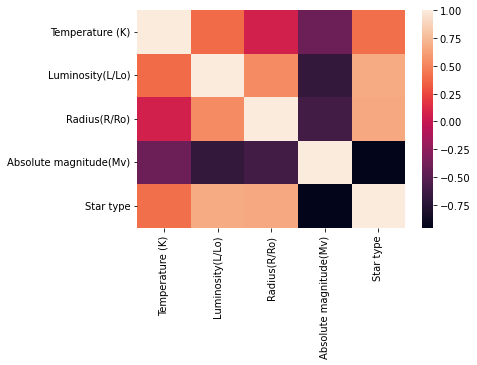

In [263]:
sns.heatmap(df.corr())

Absolute magnitude is strongly correlated with Temperature, Luminosity, Radius, and Star Type.

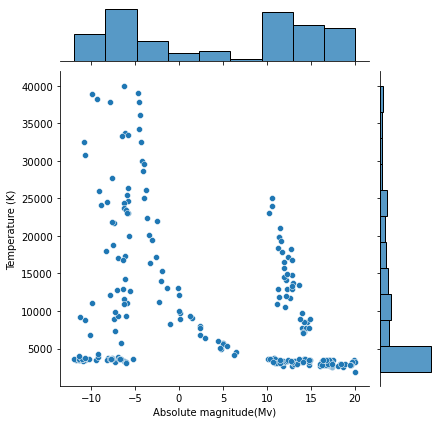

In [288]:
sns.jointplot(data=df,x='Absolute magnitude(Mv)',y='Temperature (K)')

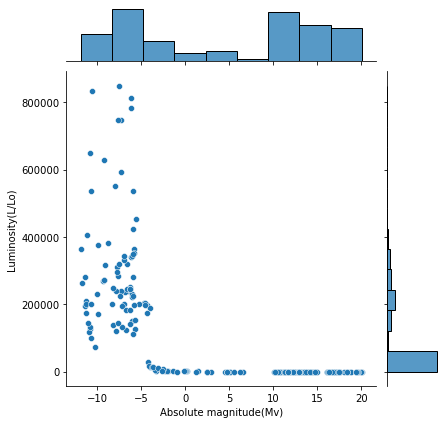

In [289]:
sns.jointplot(data=df,x='Absolute magnitude(Mv)',y='Luminosity(L/Lo)')

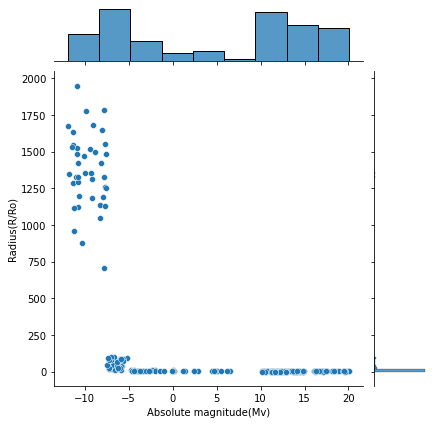

In [291]:
sns.jointplot(data=df,x='Absolute magnitude(Mv)',y='Radius(R/Ro)')

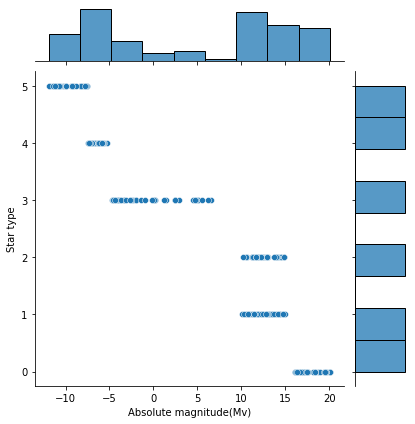

In [292]:
sns.jointplot(data=df,x='Absolute magnitude(Mv)',y='Star type')

### Relationship between star type and other variables

In [264]:
df.corr()["Star type"].sort_values()

Absolute magnitude(Mv)   -0.955276
Temperature (K)           0.411129
Radius(R/Ro)              0.660975
Luminosity(L/Lo)          0.676845
Star type                 1.000000
Name: Star type, dtype: float64

<AxesSubplot:>

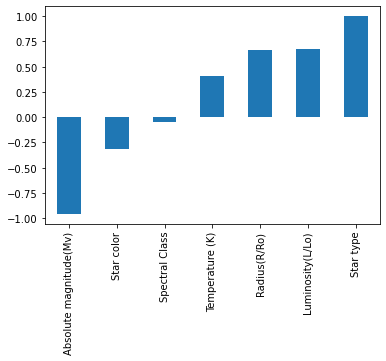

In [282]:
df.corr()["Star type"].sort_values().plot(kind='bar')

The variables with the strongest positive relationship with star type are, in order, Luminosity, Radius, and then Temperature. Also, Absolute magnitude is strongly negatively associated with star type

# Predicting Star Type  using ANNs

### Train Test Split

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Star color'] = label_encoder.fit_transform(df['Star color'])
df['Spectral Class'] = label_encoder.fit_transform(df['Spectral Class'])
encoded_Y = label_encoder.fit_transform(df['Star type'].values)

In [268]:
from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(encoded_Y, num_classes=None)

In [269]:
df.dropna(inplace=True)
X = df.drop("Star type", axis=1).values
y = df['Star type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

### Creating Model

In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [271]:
X_train.shape

(180, 6)

In [331]:
model = Sequential()


#Input layer with 6 nodes
model.add(Dense(units=6, activation='relu'))

#Hidden layer with mean of input and output
model.add(Dense(units=6, activation='relu'))

#Output layer with 6 node
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training Model

In [338]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          )

Epoch 1/600
6/6 [==============================] - 0s 18ms/step - loss: 78.4794 - accuracy: 0.6556 - val_loss: 28.6222 - val_accuracy: 0.6167
Epoch 2/600
6/6 [==============================] - 0s 12ms/step - loss: 63.8850 - accuracy: 0.6222 - val_loss: 5.3975 - val_accuracy: 0.5333
Epoch 3/600
6/6 [==============================] - 0s 10ms/step - loss: 42.6187 - accuracy: 0.6722 - val_loss: 2.5157 - val_accuracy: 0.6500
Epoch 4/600
6/6 [==============================] - 0s 12ms/step - loss: 21.2121 - accuracy: 0.6611 - val_loss: 0.8279 - val_accuracy: 0.7167
Epoch 5/600
6/6 [==============================] - 0s 13ms/step - loss: 33.1834 - accuracy: 0.6611 - val_loss: 1.2164 - val_accuracy: 0.6667
Epoch 6/600
6/6 [==============================] - 0s 12ms/step - loss: 43.1039 - accuracy: 0.6778 - val_loss: 1.1226 - val_accuracy: 0.7167
Epoch 7/600
6/6 [==============================] - 0s 12ms/step - loss: 38.7689 - accuracy: 0.7333 - val_loss: 0.7152 - val_accuracy: 0.7167
Epoch 8/600


### Evaluating Model

<AxesSubplot:>

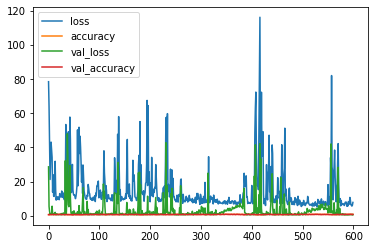

In [339]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()